In [219]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
image=cv2.imread('Car_Images/Car_5.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

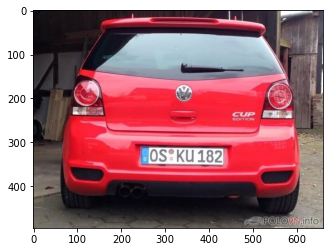

In [221]:
plt.imshow(image)

In [222]:
def plot_image(image,title=""):
    plt.figure(figsize=[10,10])
    plt.title(title)
    plt.imshow(image,cmap='gray')

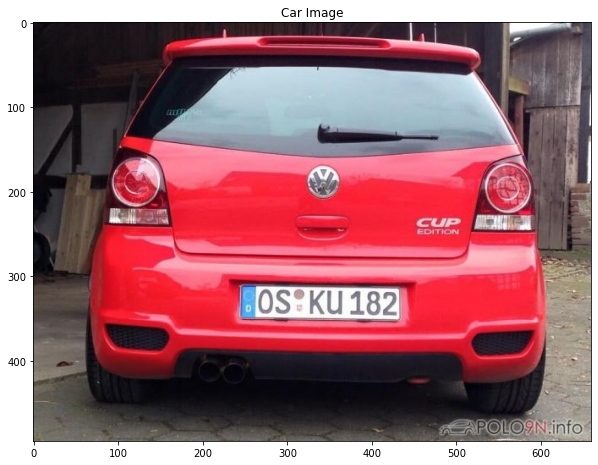

In [223]:
plot_image(image,"Car Image")

In [224]:
gray_image=cv2.imread('Car_Images/car_5.jpg',0)

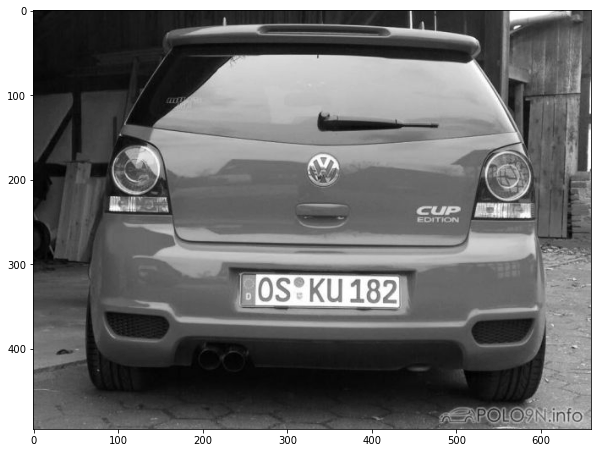

In [225]:
plot_image(gray_image)

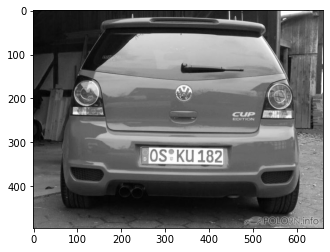

In [226]:
plt.imshow(gray_image,cmap='gray')

In [227]:
#plt.imshow(image,cmap='gray')

In [228]:
blur_image=cv2.GaussianBlur(gray_image,(5,5),0)

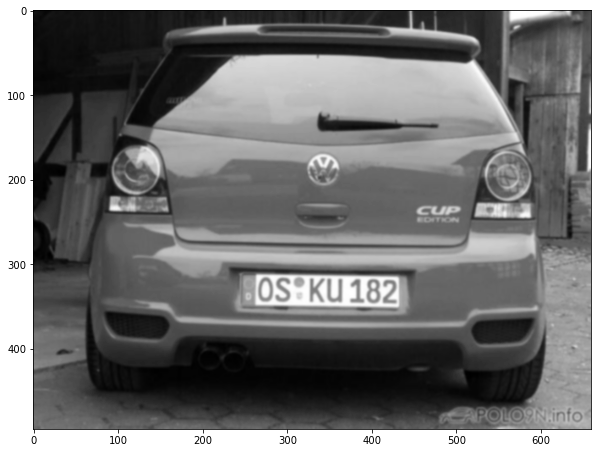

In [229]:
plot_image(blur_image)

In [230]:
edged_image=cv2.Canny(blur_image,120,170)

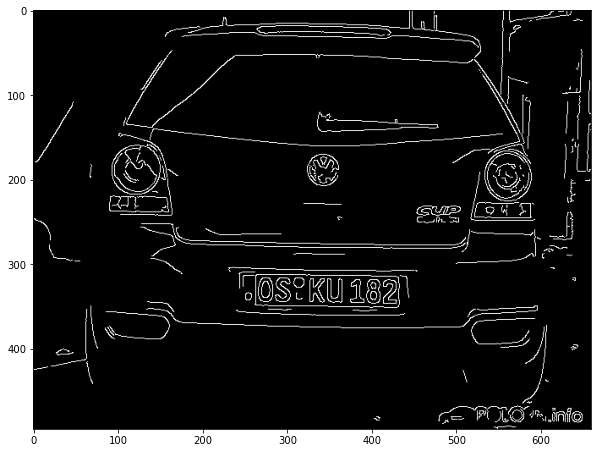

In [231]:
plot_image(edged_image)

In [232]:
edged_copy=edged_image.copy()

In [233]:
contours,hierarchy=cv2.findContours(edged_copy,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [234]:
type(contours)

list

In [235]:
type(hierarchy)

numpy.ndarray

In [236]:
len(contours)

228

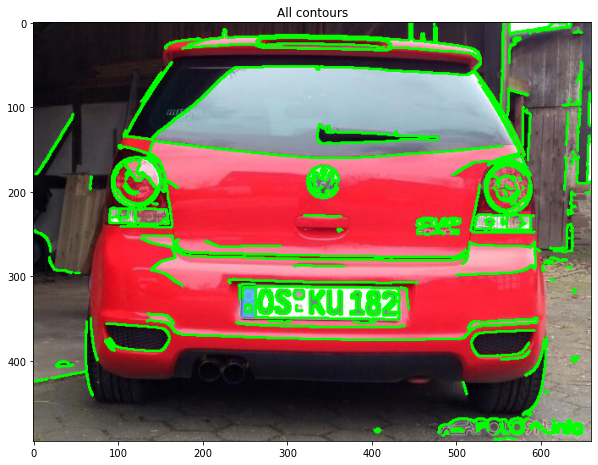

In [237]:
img_copy=image.copy()
cv2.drawContours(img_copy,contours,-1,(0,255,0),2)
plot_image(img_copy,"All contours")

In [238]:
cnts=sorted(contours,key=cv2.contourArea,reverse=True)[:30]

In [239]:
NumberPlateCnt=None

In [240]:
len(cnts)

30

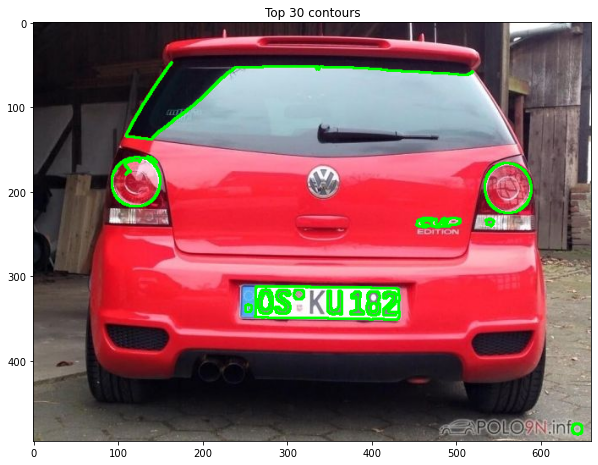

In [241]:
img_copy2=image.copy()
cv2.drawContours(img_copy2,cnts,-1,(0,255,0),2)
plot_image(img_copy2,"Top 30 contours")

In [242]:
for c in cnts:
    perimeter=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.02*perimeter,True)
    if len(approx)==4:
        NumberPlateCnt=approx
        x,y,w,h=cv2.boundingRect(c)
        new_img=gray_image[y:y+h,x:x+w]
        cv2.imwrite("number plate image.jpg",new_img)
        break

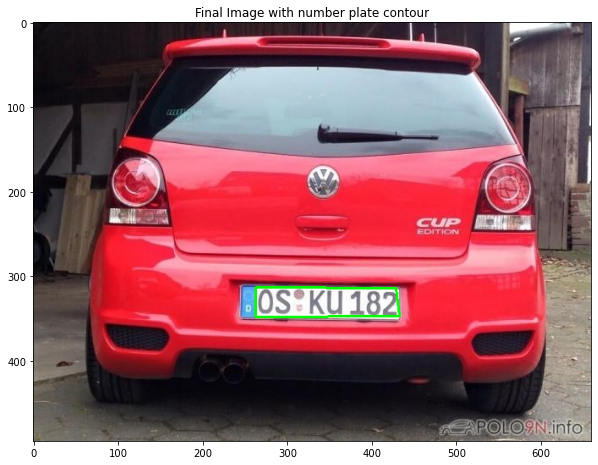

In [243]:
img3=image.copy()
cv2.drawContours(img3,[NumberPlateCnt],-1,(0,255,0),2)
plot_image(img3,"Final Image with number plate contour")

numpy.ndarray

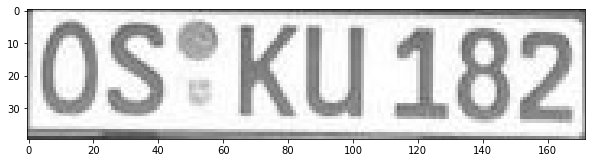

In [244]:
number_plate=cv2.imread('number plate image.jpg')
plot_image(number_plate)
type(number_plate)

In [245]:
import pytesseract

In [246]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [247]:
text=pytesseract.image_to_string('number plate image.jpg',lang='eng')
print("Number Plate is ",text)

Number Plate is  


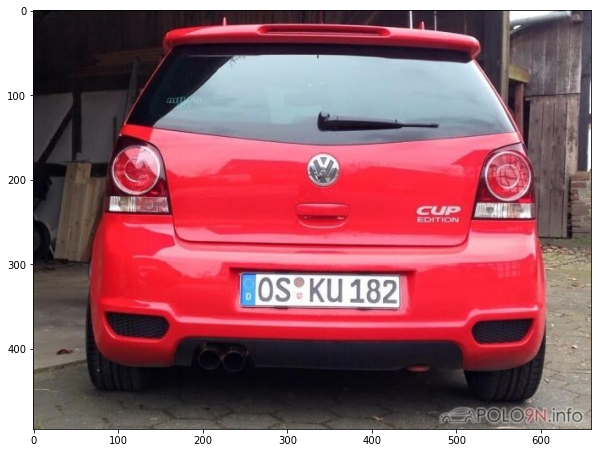

In [248]:
plot_image(image)

In [249]:
gray_copy=gray_image.copy()

In [250]:
image=cv2.imread('Car_Images/car_5.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

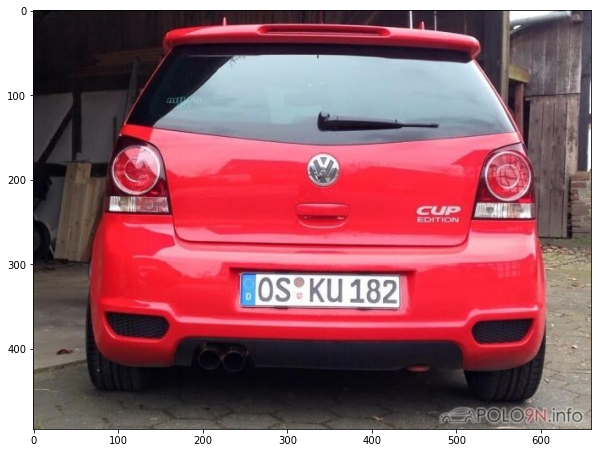

In [251]:
plot_image(image)

In [252]:
plate_cascade=cv2.CascadeClassifier('C:\\Users\\Shudhanshu\\OneDrive\\Documents\\College Materials\\ANPR_Project\\haarcascade_russian_plate_number.xml')

In [253]:
def detect_number_plate(image):
    
    plate_image=image.copy()
    
    plate_rects=plate_cascade.detectMultiScale(plate_image,scaleFactor=1.3,minNeighbors=3)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_image,(x,y),(x+w,y+h),(0,255,0),4)
        new_img=gray_copy[y:y+h,x:x+w]
        cv2.imwrite("number plate3.jpg",new_img)
        
    
    return plate_image
    

In [254]:
img=detect_number_plate(image)

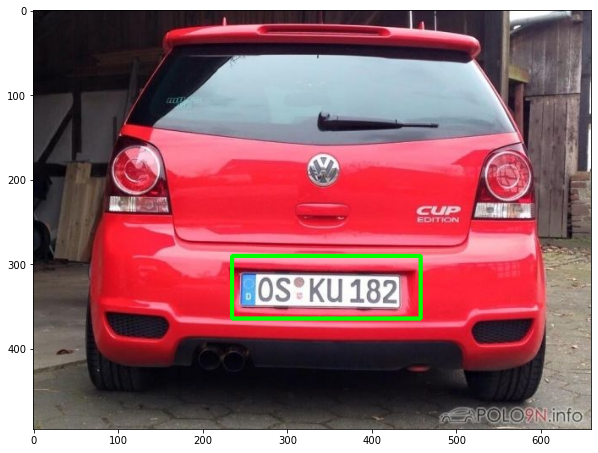

In [255]:
plot_image(img)

In [256]:
image3=cv2.imread('number plate3.jpg')

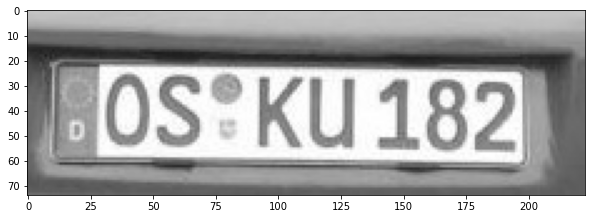

In [257]:
plot_image(image3)

In [258]:
text=pytesseract.image_to_string('number plate3.jpg',lang='eng')
print("Number Plate is ",text)

Number Plate is  0S° KU 182]

